In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:

df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.corr(numeric_only = True)['Exited'].sort_values(ascending = False)

,Exited
Exited,1.000000
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
HasCrCard,-0.007138
Tenure,-0.014001
CreditScore,-0.027094
NumOfProducts,-0.047820
IsActiveMember,-0.156128


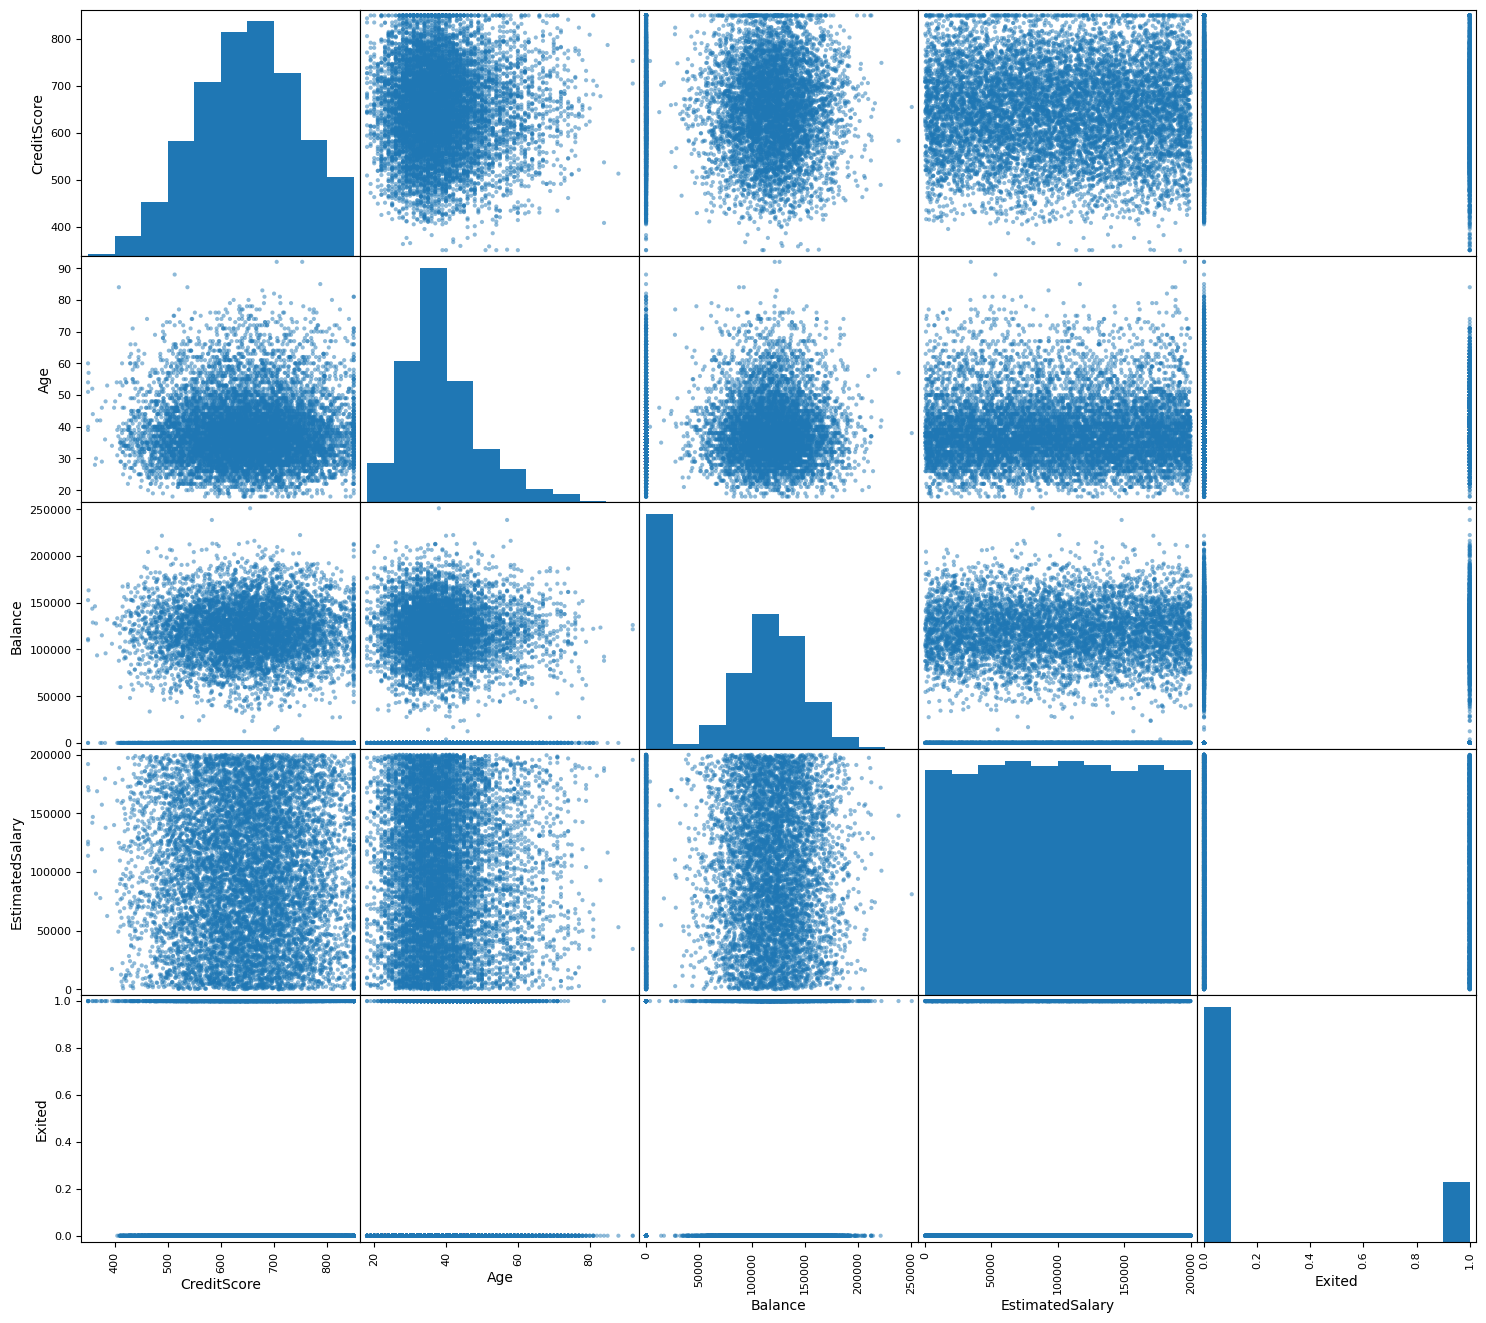

In [ ]:

from pandas.plotting import scatter_matrix


features = ["CreditScore", "Geography", "Age", "Balance", 'Gender', "EstimatedSalary", "Exited"]
scatter_matrix(df[features], figsize=(18,16));
plt.show()

In [ ]:
df = df[(df['Balance'] != 0) | (df['Exited'] != 0)]

<Axes: >

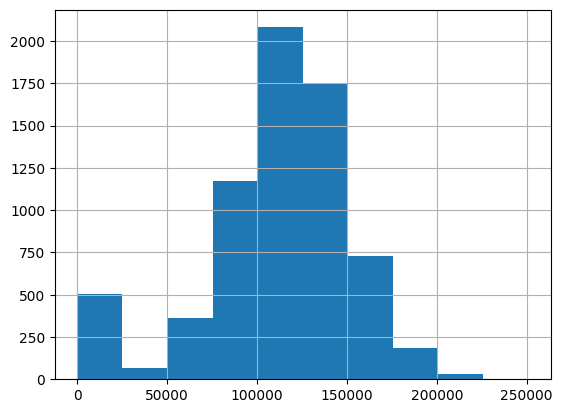

In [ ]:
df['Balance'].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6883 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6883 non-null   int64  
 1   Geography        6883 non-null   object 
 2   Gender           6883 non-null   object 
 3   Age              6883 non-null   int64  
 4   Tenure           6883 non-null   int64  
 5   Balance          6883 non-null   float64
 6   NumOfProducts    6883 non-null   int64  
 7   HasCrCard        6883 non-null   int64  
 8   IsActiveMember   6883 non-null   int64  
 9   EstimatedSalary  6883 non-null   float64
 10  Exited           6883 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 645.3+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000
mean,650.609908,39.614412,4.967165,111122.895958,1.394595,0.699550,0.502397,100794.698320,0.295947
std,97.201835,10.525834,2.910727,42512.705162,0.598395,0.458487,0.500031,57424.158136,0.456500
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,94703.575000,1.000000,0.000000,0.000000,51933.770000,0.000000
50%,652.000000,38.000000,5.000000,116886.590000,1.000000,1.000000,1.000000,101108.850000,0.000000
75%,718.000000,45.000000,7.000000,137721.500000,2.000000,1.000000,1.000000,149690.280000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [ ]:

X = df.drop('Exited', axis = 1)
y = df['Exited'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(
    X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(
    X_train_full,y_train_full,random_state=42)

In [ ]:
X_train_full.shape

(5162, 10)

In [ ]:
y_train_full.shape

(5162,)

In [ ]:
X_train.shape

(3871, 10)

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_features = X_train.select_dtypes(include = np.number).columns
cat_features = X_train.select_dtypes(include = ['object']).columns
cat_features

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_predict

np.random.seed(42)

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),
                             StandardScaler(),
                             PolynomialFeatures(degree = 2, include_bias = False))

cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder())

transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [ ]:
X_train_transformer =transformer.fit_transform(X_train)
X_valid_transformer =transformer.transform(X_valid)
X_test_transformer =transformer.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_transformer.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train_transformer, y_train,
    validation_data=(X_valid_transformer, y_valid),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7344 - loss: 0.5886 - val_accuracy: 0.8342 - val_loss: 0.4295
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.3861 - val_accuracy: 0.8304 - val_loss: 0.4011
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3542 - val_accuracy: 0.8335 - val_loss: 0.3953
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3379 - val_accuracy: 0.8381 - val_loss: 0.3938
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3256 - val_accuracy: 0.8366 - val_loss: 0.3947
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3151 - val_accuracy: 0.8327 - val_loss: 0.3961
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.3061 - val_accuracy: 0.8327 - val_loss: 0.3982
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8811 - loss: 0.2980 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_transformer, y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.3980


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
num_wide_features = X_train_transformer[:, :5].shape[1]
num_deep_features = X_train_transformer[:, 5:].shape[1]
input_wide = tf.keras.layers.Input(shape=[num_wide_features])
input_deep = tf.keras.layers.Input(shape=[num_deep_features])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [ ]:
history = model.fit(
    [X_train_transformer[:, :5], X_train_transformer[:, 5:]],
    y_train,
    validation_data=([X_valid_transformer[:, :5], X_valid_transformer[:, 5:]], y_valid),
    epochs=30,
    batch_size=32)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6985 - loss: 0.6487 - val_accuracy: 0.7676 - val_loss: 0.5341
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4793 - val_accuracy: 0.8002 - val_loss: 0.4795
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4214 - val_accuracy: 0.8118 - val_loss: 0.4490
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3901 - val_accuracy: 0.8187 - val_loss: 0.4301
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8511 - loss: 0.3696 - val_accuracy: 0.8249 - val_loss: 0.4184
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3548 - val_accuracy: 0.8280 - val_loss: 0.4119
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.3439 - val_accuracy: 0.8311 - val_loss: 0.4095
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3353 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate([X_test_transformer[:, :5], X_test_transformer[:, 5:]], y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.4157


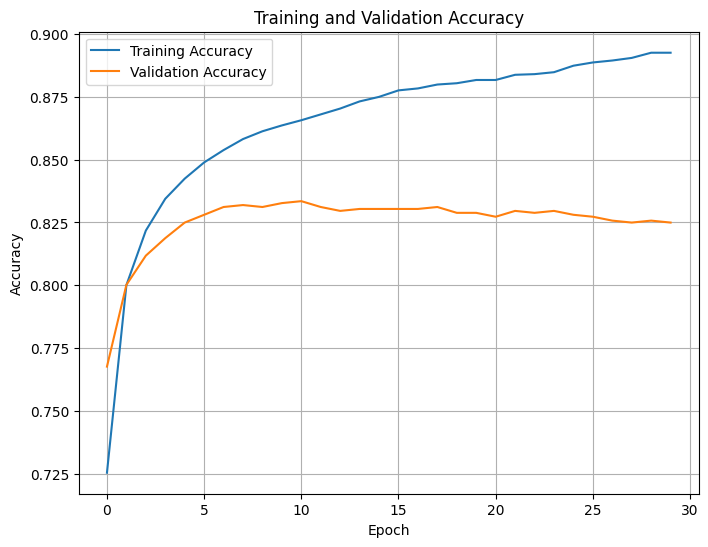

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
num_wide_features = X_train_transformer[:, :5].shape[1]
num_deep_features = X_train_transformer[:, 5:].shape[1]
input_wide = tf.keras.layers.Input(shape=[num_wide_features])
input_deep = tf.keras.layers.Input(shape=[num_deep_features])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output1 = tf.keras.layers.Dense(1, activation='sigmoid')(concat)
output2 = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output1,output2])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','accuracy'])

In [ ]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [ ]:
history = model.fit(
    [X_train_transformer[:, :5], X_train_transformer[:, 5:]],
    (y_train,y_train),
    validation_data=([X_valid_transformer[:, :5], X_valid_transformer[:, 5:]], (y_valid,y_valid)),
    epochs=30,
    batch_size=32)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - dense_2_accuracy: 0.6088 - dense_3_accuracy: 0.6162 - loss: 1.3484 - val_dense_2_accuracy: 0.7754 - val_dense_3_accuracy: 0.7831 - val_loss: 1.0372
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_2_accuracy: 0.8116 - dense_3_accuracy: 0.8147 - loss: 0.9573 - val_dense_2_accuracy: 0.8156 - val_dense_3_accuracy: 0.8048 - val_loss: 0.9158
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_accuracy: 0.8344 - dense_3_accuracy: 0.8320 - loss: 0.8372 - val_dense_2_accuracy: 0.8273 - val_dense_3_accuracy: 0.8149 - val_loss: 0.8657
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_accuracy: 0.8432 - dense_3_accuracy: 0.8385 - loss: 0.7823 - val_dense_2_accuracy: 0.8273 - val_dense_3_accuracy: 0.8195 - val_loss: 0.8436
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_accuracy: 0.8505 - dense_3_accuracy: 0.8421 - loss: 0.7467 - val_dense_2_accuracy: 0.8265 - val_dense_3_accuracy: 0.8172 - val_los

In [ ]:
test_loss, test_accuracy1, test_accuracy2 = model.evaluate(
    [X_test_transformer[:, :5], X_test_transformer[:, 5:]],
    (y_test, y_test)
)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_2_accuracy: 0.8253 - dense_3_accuracy: 0.8214 - loss: 0.9178
